<a href="https://colab.research.google.com/github/andrejfg/IA-Carro_Flex/blob/main/IA-Carro-Flex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Implementação - Carro Flex

Neste contexto, a inteligência deve definir os melhores momento de compra de combustível e se vai comprar gasolina ou álcool.

A cada dia (Época) o preço dos combustíveis variam além do tanque de combustível reduzir, fazendo-se necessária a compra independente do preço.

# Configuração de execução

In [21]:
qtde_dias = 50

# Importar bibliotecas necessárias para executar o código


In [22]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Definição do ambiente

Vamos armazenar no ambiente as seguintes informações:

*   Informação do dia
*   Preço da % do tanque em cada um dos dias para alcool e gasolina
*   Histórico de preços
*   Histórico de nível no tanque em porcentagem
*   Histórico de % de tanque comprado

In [23]:
# Definicao da classe ambiente
class Ambiente():

  def __init__(self):
    # Ambiente explorado pelo agente de tanque de combustivel flex
    self.num_dias=0
    # tanque contabilizado em porcentagem 
    self.tanque_alcool=0.5
    self.tanque_gasolina=0.5
    self.historico_preco_alcool=[5.0]
    self.historico_preco_gasolina=[6.0]
    self.historico_tanque_alcool=[self.tanque_alcool]
    self.historico_tanque_gasolina=[self.tanque_gasolina]
    self.historico_alcool_comprado=[0]
    self.historico_gasolina_comprado=[0]

  def percebe_preco_atual(self):
    return [self.historico_preco_alcool[len(self.historico_preco_alcool)-1], self.historico_preco_gasolina[len(self.historico_preco_gasolina)-1]]

  def percebe_tanque(self):
    return self.historico_tanque_alcool[len(self.historico_tanque_alcool)-1] + self.historico_tanque_gasolina[len(self.historico_tanque_gasolina)-1]  

  def run(self, dic_acoes):
    '''Realizar alteracoes no ambiente: 
       Definir, aleatoriamente, uma quantidade de produtos consumidos
       Atualizar o historico do preco atual e do estoque.
       Essas informacoes serao utilizadas pelo agente para decidir a compra ou nao de produtos
    '''
    # Consumo realizado (valores gerados aleatoriamente)
    porcentagem_consumida = 0.2*random.random()
    alcool_consumido= self.historico_tanque_alcool[len(self.historico_tanque_alcool)-1]/(self.historico_tanque_alcool[len(self.historico_tanque_alcool)-1]+self.historico_tanque_gasolina[len(self.historico_tanque_gasolina)-1])*porcentagem_consumida
    gasolina_consumida= self.historico_tanque_gasolina[len(self.historico_tanque_gasolina)-1]/(self.historico_tanque_alcool[len(self.historico_tanque_alcool)-1]+self.historico_tanque_gasolina[len(self.historico_tanque_gasolina)-1])*porcentagem_consumida

    tanque_atual_alcool = self.historico_tanque_alcool[len(self.historico_tanque_alcool)-1] - alcool_consumido + dic_acoes["comprarAlcool"]
    tanque_atual_gasolina = self.historico_tanque_gasolina[len(self.historico_tanque_gasolina)-1] - gasolina_consumida + dic_acoes["comprarGasolina"]
    self.historico_tanque_alcool.append(tanque_atual_alcool)
    self.historico_tanque_gasolina.append(tanque_atual_gasolina)
    self.historico_alcool_comprado.append(dic_acoes["comprarAlcool"])
    self.historico_gasolina_comprado.append(dic_acoes["comprarGasolina"])

    # Informando valor do produto no periodo (Atualizacao para o proximo dia)
    valor_alcool = 3 + 2 * random.random() # novo valor para alcool. 
    valor_gasolina = 5 + 2 * random.random() # novo valor para gasolina.
    self.historico_preco_alcool.append(valor_alcool)
    self.historico_preco_gasolina.append(valor_gasolina)

# Definição do agente

O agente vai armazenar informações sobre:
*   Ambiente (Composição de classes)
*   Valor médio das compras dos combustíveis
*   Informação do último valor dos combustíveis
*   Informação sobre o nível de tanque

In [24]:
# Definição da classe agente

class Agente():
  
  def __init__(self, ambiente):
    self.num_dias = 1
    self.ambiente= ambiente
    self.tanque= ambiente.percebe_tanque()
    self.total_gasto = 0
    self.preco_atual_alcool,self.preco_atual_gasolina = self.media_alcool, self.media_gasolina = ambiente.percebe_preco_atual()

  def executa_agente(self, qtde_dias=20):

    for i in range(qtde_dias): 
      # O agente percebe o estado do ambiente
      self.tanque= self.ambiente.percebe_tanque()
      self.preco_atual_alcool,self.preco_atual_gasolina = self.ambiente.percebe_preco_atual()
      
      '''
        Controlador do agente:
        - Define a regra para compra de produtos
      '''
      
      if self.preco_atual_alcool/self.preco_atual_gasolina < 0.7 and self.preco_atual_alcool < self.media_alcool and self.tanque < 1:
        compraAlcool = 1-self.tanque
        compraGasolina = 0
      elif self.preco_atual_gasolina < self.media_gasolina and self.tanque < 1:
        compraGasolina = 1-self.tanque
        compraAlcool = 0
      elif self.tanque < 0.5 :
        if self.preco_atual_alcool/self.preco_atual_gasolina < 0.7:
          compraAlcool= (1-self.tanque) * 0.5
          compraGasolina = 0
        else:
          compraGasolina = (1-self.tanque) * 0.5 
          compraAlcool = 0
      else:
        compraAlcool = 0
        compraGasolina = 0
      
      # Fim do controlador
      self.total_gasto += self.preco_atual_alcool*compraAlcool + self.preco_atual_gasolina*compraGasolina
      # O agente aplica modificacoes ao ambiente)
      self.ambiente.run({"comprarAlcool": compraAlcool, "comprarGasolina": compraGasolina})

      self.num_dias+=1
      self.media_alcool = (self.media_alcool*(self.num_dias-1) + self.preco_atual_alcool)/self.num_dias
      self.media_gasolina = (self.media_gasolina*(self.num_dias-1) + self.preco_atual_gasolina)/self.num_dias

# Definir classe para impressão dos resultados


In [25]:
class Imprime():
  def imprime_resultado(agente):
    historico_dias = np.linspace(0, agente.num_dias, agente.num_dias)

    # Primeira impressão: historico do preco dos combustiveis
    plt.plot(historico_dias, agente.ambiente.historico_preco_alcool, 'bo--', label='Historico (preço) - Alcool')
    plt.legend()
    plt.show()

    plt.plot(historico_dias, agente.ambiente.historico_preco_gasolina, 'bo--', label='Historico (preço) - Gasolina')
    plt.legend()
    plt.show()

    # Segunda impressão: historico % de tanque comprado 
    fig, ax = plt.subplots()
    ax.vlines(historico_dias, ymin=0, ymax=agente.ambiente.historico_alcool_comprado)
    ax.plot(historico_dias, agente.ambiente.historico_alcool_comprado, "go")
    ax.set_ylim(0, 1)
    plt.show()

    fig, ax = plt.subplots()
    ax.vlines(historico_dias, ymin=0, ymax=agente.ambiente.historico_gasolina_comprado)
    ax.plot(historico_dias, agente.ambiente.historico_gasolina_comprado, "go")
    ax.set_ylim(0, 1)
    plt.show()


    # Terceira impressão: historico do nível do tanque para cada combustível
    plt.plot(historico_dias, agente.ambiente.historico_tanque_alcool, 'rD--', label='Historico (estoque)')
    plt.legend()
    plt.show()

    plt.plot(historico_dias, agente.ambiente.historico_tanque_gasolina, 'rD--', label='Historico (estoque)')
    plt.legend()
    plt.show()

    


# Execução do programa

Por um determinado número de iterações, vamos gerar valores aleatórios para o preco do papel higienico e a quantidade de produto consumido

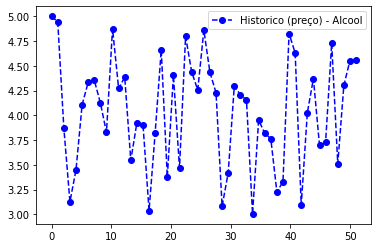

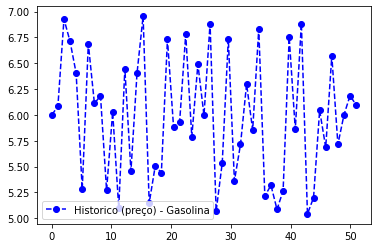

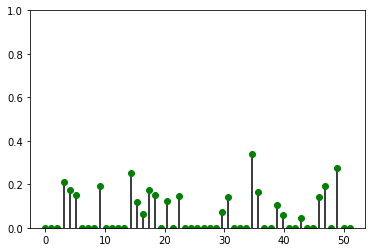

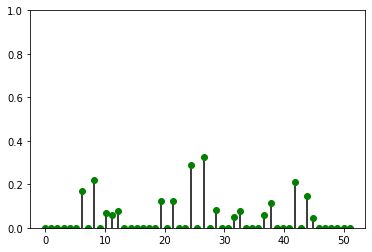

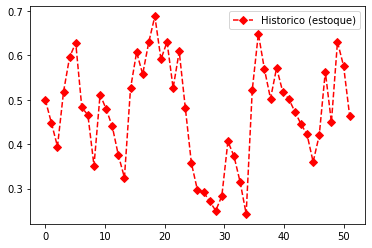

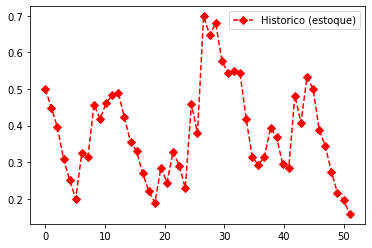

In [26]:
ambiente_atuacao = Ambiente()
carro_flex = Agente(ambiente_atuacao)
carro_flex.executa_agente(qtde_dias)


Imprime.imprime_resultado(carro_flex)